#### Project: Skill Demand

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from adjustText import adjust_text
import matplotlib.ticker as mticker
import seaborn as sns
#load the data
from datasets import load_dataset
dataset = load_dataset('lukebarousse/data_jobs')
dfj = dataset['train'].to_pandas()
#data clean-up
dfj['job_posted_date']=pd.to_datetime(dfj['job_posted_date'])
dfj['job_skills'] = dfj['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

dfj_DA = dfj[dfj['job_title_short']=='Data Analyst'].copy() # calling specificallly the role from the column for the remainder of the lessons

In [4]:
dfj_DA_US = dfj[(dfj['job_title_short'] == 'Data Analyst') & (dfj['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
dfj_DA_US = dfj_DA_US.dropna(subset=['salary_year_avg'])

dfj_DA_US_exploded = dfj_DA_US.explode('job_skills')

dfj_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [ ]:
# using df_DA find the count of skills and also the median salary for each skill
dfj_DA_skills = dfj_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

dfj_DA_skills = dfj_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(dfj_DA_US)  # Find count of Data Analyst jobs in US with salary info

# new column for the percentage of jobs that have a specific skill
dfj_DA_skills['skill_percent'] = dfj_DA_skills['skill_count'] / DA_job_count * 100

dfj_DA_skills = dfj_DA_skills[dfj_DA_skills['skill_count'] > 0]

dfj_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


#### Median Salary vs Percent Skill Demand

In [11]:
skill_limit = 5

dfj_DA_skills_high_demand = dfj_DA_skills[dfj_DA_skills['skill_percent'] > skill_limit]

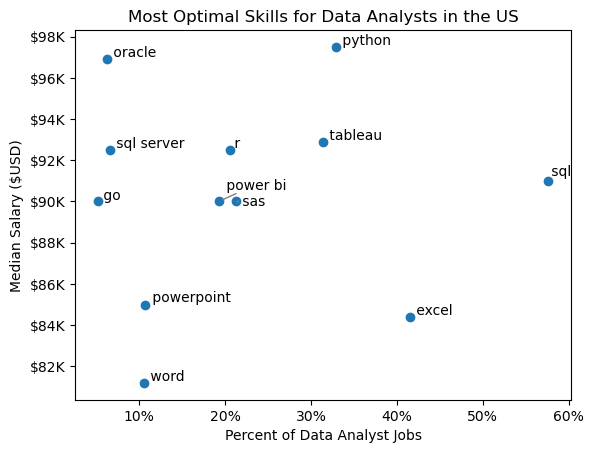

In [20]:
from adjustText import adjust_text

plt.scatter(dfj_DA_skills_high_demand['skill_percent'], dfj_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

from matplotlib.ticker import PercentFormatter

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))  # Example formatting x-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(dfj_DA_skills_high_demand.index):
    texts.append(plt.text(dfj_DA_skills_high_demand['skill_percent'].iloc[i], dfj_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

#### Bonus: Coloring by Technology

In [14]:
df_technology = dfj['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  # convert string to dictionary
    for key, value in row_dict.items():
        if key in technology_dict:  # if key already exists in technology_dict, add value to existing value
            technology_dict[key] += value
        else:                       # if key does not exist in technology_dict, add key and value
            technology_dict[key] = value

# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['sharepoint',
  'sas',
  'excel',
  'alteryx',
  'splunk',
  'power bi',
  'esquisse',
  'sheets',
  'powerbi',
  'sap',
  'dax',
  'nuix',
  'qlik',
  'ssrs',
  'datarobot',
  'cognos',
  'ms access',
  'microstrategy',
  'msaccess',
  'spreadsheet',
  'outlook',
  'visio',
  'word',
  'spss',
  'powerpoint',
  'looker',
  'tableau',
  'ssis'],
 'programming': ['perl',
  'go',
  'cobol',
  'objective-c',
  'dart',
  'java',
  'lisp',
  'ocaml',
  'python',
  'sas',
  'matlab',
  'c',
  'groovy',
  'swift',
  'pascal',
  'mongodb',
  'visual basic',
  'fortran',
  'rust',
  'vb.net',
  'assembly',
  'erlang',
  'kotlin',
  'delphi',
  'c#',
  'nosql',
  'apl',
  'bash',
  'vba',
  'mongo',
  'shell',
  'clojure',
  'visualbasic',
  'haskell',
  'sql',
  'julia',
  't-sql',
  'lua',
  'elixir',
  'r',
  'javascript',
  'html',
  'solidity',
  'sass',
  'f#',
  'powershell',
  'crystal',
  'no-sql',
  'c++',
  'golang',
  'css',
  'php',
  'ruby',
  'scala',
  'typescr

In [21]:
# turn dictionary into dataframe
dfj_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])

dfj_technology = dfj_technology.explode('skills')

dfj_technology

,technology,skills
0,analyst_tools,sharepoint
0,analyst_tools,sas
0,analyst_tools,excel
0,analyst_tools,alteryx
0,analyst_tools,splunk
...,...,...
9,sync,slack
9,sync,webex
9,sync,ringcentral
9,sync,rocketchat


In [30]:
# merge df_DA_skills and df_technology
dfj_DA_skills_tech = dfj_DA_skills.merge(dfj_technology, left_on='job_skills', right_on='skills').head(12)

dfj_DA_skills_tech

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


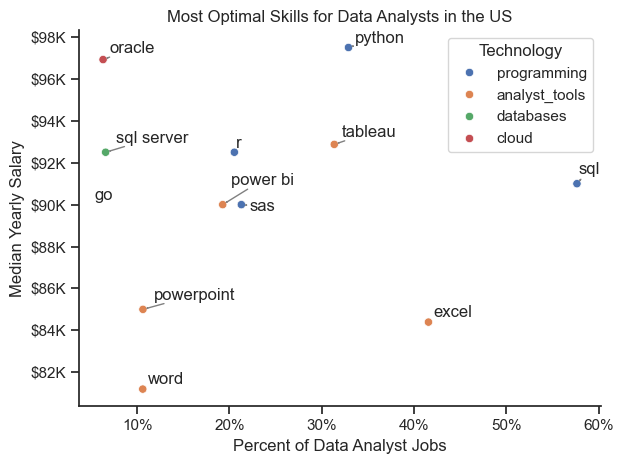

In [37]:
sns.scatterplot(
    data=dfj_DA_skills_tech,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(dfj_DA_skills_high_demand.index):
    texts.append(plt.text(dfj_DA_skills_high_demand['skill_percent'].iloc[i], dfj_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'), expand=(1.2, 1.79))

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()